<a href="https://colab.research.google.com/github/RozaSekouri/DA-projects/blob/main/Final_Project_Searching_the_Best_Hotel_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a final project analysis on Hotel reservations, and how we could possibly detect how to create the most desirable hotel.

In [47]:
#pip install pandas numpy matplotlib seaborn scikit-learn


In [48]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (3).csv


In [49]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("hotel_bookings.csv")

# Display the first few rows of the DataFrame
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Now we can check our data to see if we have any null values

In [51]:
print(df.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The Agent and Company columns are having the most null values. Even the values that exist are numeric and I cannot be sure at this point what they represent. I will drop these columns as they can be removed without altering the data analysis at this point.


In [52]:
# Drop the 'agent' and 'company' columns
df = df.drop(columns=['agent', 'company'])

# Verify the columns have been removed
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [53]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


We see that we now have 30 columns, whereas we had 32 before. This means that the agent and company column were succesfully removed.

In [54]:
print(df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [55]:
null_percentage = (df['country'].isnull().sum() / len(df)) * 100
print(f"Percentage of null values in 'country': {null_percentage:.2f}%")

Percentage of null values in 'country': 0.41%


The percentage of the null values is way too low, but there is no reason to rename them for example, as there will be of no real value to keep them this way. If we want to explore the impact per country for example, we will have 500 unknown countries. It will be better to remove these rows.

In [56]:
df = df.dropna(subset=['country'])
print(df['country'].isnull().sum())

0


This should output 0, indicating that there are no null values left in the country column.

In [57]:
print("Number of rows after removing null values:", len(df))

Number of rows after removing null values: 118902


In [58]:
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


We have now cleaned our data from all null/missing values. Now we will see what other modiifications needed, for example in the deposit column, we can change No deposit to False and Yes to true.

In [59]:
df['deposit_type'] = df['deposit_type'].apply(lambda x: True if x == 'Non Refund' else False)
print(df['deposit_type'].value_counts())


deposit_type
False    104329
True      14573
Name: count, dtype: int64


will remove the column is canceled as we can have this information in a better format, as check out (active reservation) or canceled. This will avoid any possible misunderstanding.

In [ ]:
# Remove the 'is_canceled' column
df = df.drop(columns=['is_canceled'])

# Verify the column has been removed
df.columns



In [60]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,False,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,False,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,False,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,False,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,False,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,False,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,False,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,False,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,False,0,Transient,104.40,0,0,Check-Out,2017-09-07


1. Children
Check if having children affects the number of reservations:

Reservations by Number of Children:
 children
0.0     110319
1.0       4852
2.0       3650
3.0         76
10.0         1
Name: is_canceled, dtype: int64


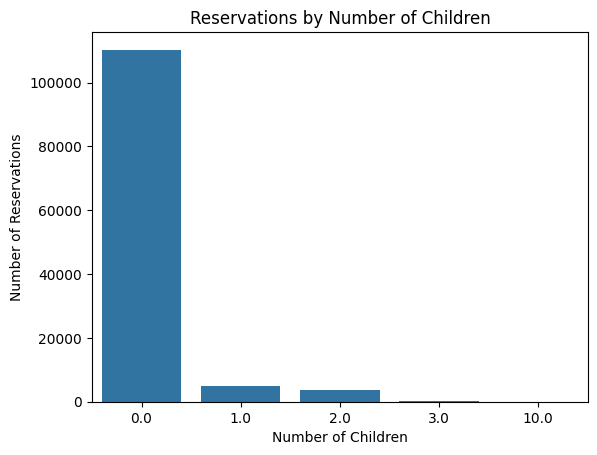

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'children' and count reservations
children_reservations = df.groupby('children')['is_canceled'].count()
print("Reservations by Number of Children:\n", children_reservations)

# Plot
sns.barplot(x=children_reservations.index, y=children_reservations.values)
plt.title("Reservations by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Number of Reservations")
plt.show()

2. Parking
Check if parking availability affects reservations:

Reservations by Parking Spaces:
 required_car_parking_spaces
0    111592
1      7277
2        28
3         3
8         2
Name: is_canceled, dtype: int64


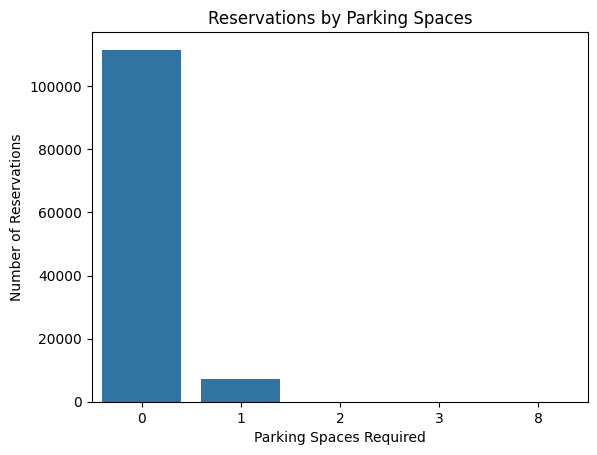

In [62]:
# Group by 'required_car_parking_spaces' and count reservations
parking_reservations = df.groupby('required_car_parking_spaces')['is_canceled'].count()
print("Reservations by Parking Spaces:\n", parking_reservations)

# Plot
sns.barplot(x=parking_reservations.index, y=parking_reservations.values)
plt.title("Reservations by Parking Spaces")
plt.xlabel("Parking Spaces Required")
plt.ylabel("Number of Reservations")
plt.show()

3. Meals
Check if meal type affects reservations:

Reservations by Meal Type:
 meal
BB           91867
FB             798
HB           14434
SC           10638
Undefined     1165
Name: is_canceled, dtype: int64


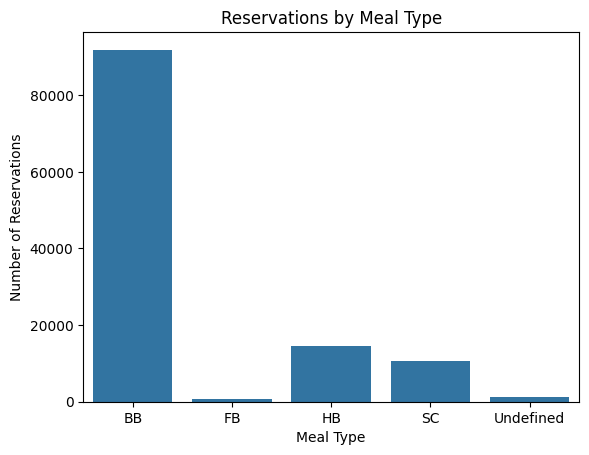

In [63]:
# Group by 'meal' and count reservations
meal_reservations = df.groupby('meal')['is_canceled'].count()
print("Reservations by Meal Type:\n", meal_reservations)

# Plot
sns.barplot(x=meal_reservations.index, y=meal_reservations.values)
plt.title("Reservations by Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Number of Reservations")
plt.show()

4. Deposit Type
Check if deposit type affects reservations: (False No Deposit , True Non refundable)

Reservations by Deposit Type:
 deposit_type
False    104329
True      14573
Name: is_canceled, dtype: int64


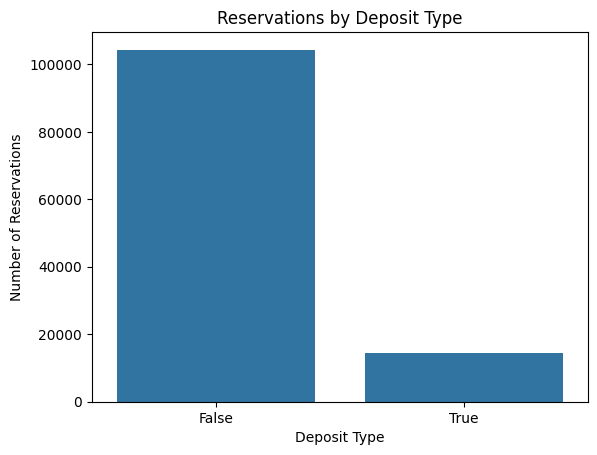

In [64]:
# Group by 'deposit_type' and count reservations
deposit_reservations = df.groupby('deposit_type')['is_canceled'].count()
print("Reservations by Deposit Type:\n", deposit_reservations)

# Plot
sns.barplot(x=deposit_reservations.index, y=deposit_reservations.values)
plt.title("Reservations by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Number of Reservations")
plt.show()

Step 3: Analyze Features Affecting Cancellations
We can check how features like children, parking, meals, and deposit_type affect cancellations.

1. Children
Check if having children affects cancellations:

Cancellation Rate by Number of Children:
 children
0.0     0.371894
1.0     0.322960
2.0     0.422192
3.0     0.223684
10.0    1.000000
Name: is_canceled, dtype: float64


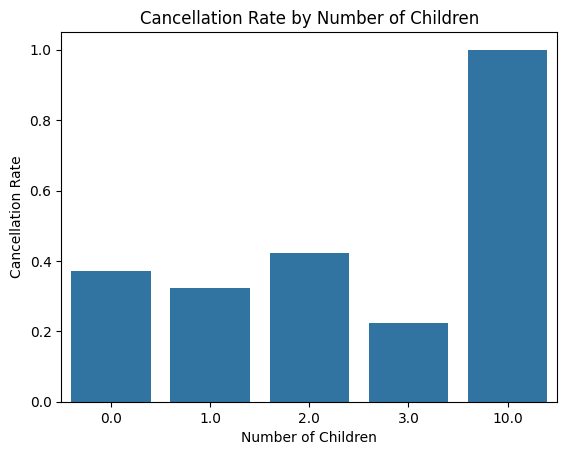

In [65]:
# Group by 'children' and calculate cancellation rate
children_cancellations = df.groupby('children')['is_canceled'].mean()
print("Cancellation Rate by Number of Children:\n", children_cancellations)

# Plot
sns.barplot(x=children_cancellations.index, y=children_cancellations.values)
plt.title("Cancellation Rate by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Cancellation Rate")
plt.show()

2. Parking
Check if parking availability affects cancellations:

Cancellation Rate by Parking Spaces:
 required_car_parking_spaces
0    0.3957
1    0.0000
2    0.0000
3    0.0000
8    0.0000
Name: is_canceled, dtype: float64


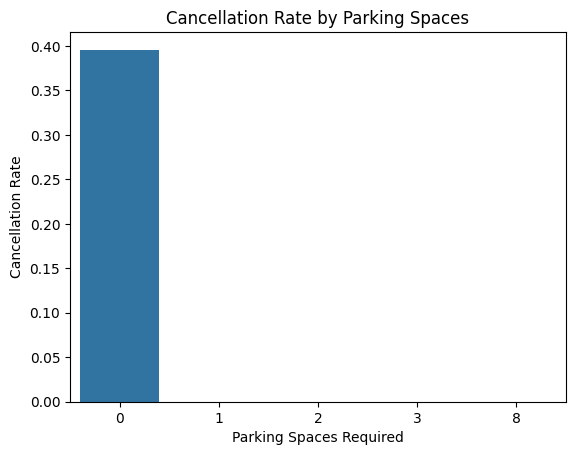

In [66]:
# Group by 'required_car_parking_spaces' and calculate cancellation rate
parking_cancellations = df.groupby('required_car_parking_spaces')['is_canceled'].mean()
print("Cancellation Rate by Parking Spaces:\n", parking_cancellations)

# Plot
sns.barplot(x=parking_cancellations.index, y=parking_cancellations.values)
plt.title("Cancellation Rate by Parking Spaces")
plt.xlabel("Parking Spaces Required")
plt.ylabel("Cancellation Rate")
plt.show()

3. Meals
Check if meal type affects cancellations:

Cancellation Rate by Meal Type:
 meal
BB           0.375064
FB           0.598997
HB           0.345088
SC           0.371874
Undefined    0.245494
Name: is_canceled, dtype: float64


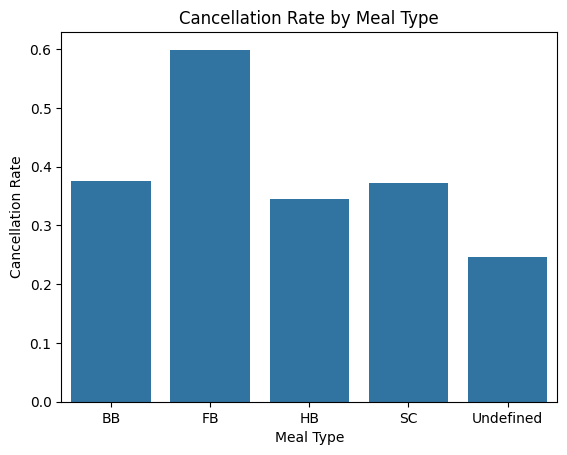

In [67]:
# Group by 'meal' and calculate cancellation rate
meal_cancellations = df.groupby('meal')['is_canceled'].mean()
print("Cancellation Rate by Meal Type:\n", meal_cancellations)

# Plot
sns.barplot(x=meal_cancellations.index, y=meal_cancellations.values)
plt.title("Cancellation Rate by Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Cancellation Rate")
plt.show()

4. Deposit Type
Check if deposit type affects cancellations:

Cancellation Rate by Deposit Type:
 deposit_type
False    0.284456
True     0.993618
Name: is_canceled, dtype: float64


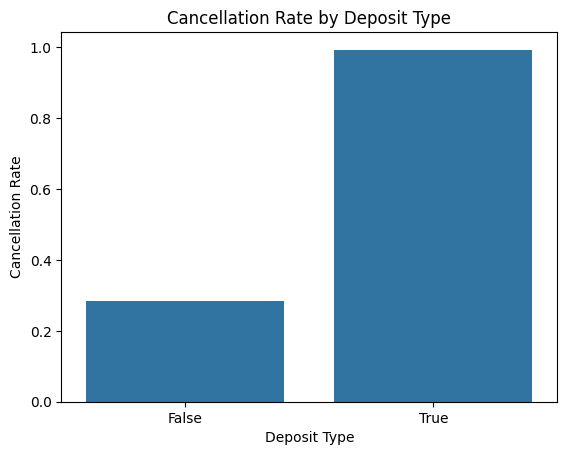

In [68]:
# Group by 'deposit_type' and calculate cancellation rate
deposit_cancellations = df.groupby('deposit_type')['is_canceled'].mean()
print("Cancellation Rate by Deposit Type:\n", deposit_cancellations)

# Plot
sns.barplot(x=deposit_cancellations.index, y=deposit_cancellations.values)
plt.title("Cancellation Rate by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate")
plt.show()

Step 4: Analyze Months with the Most Reservations
Check which months have the most reservations:

Reservations by Month:
 arrival_date_month
January       5874
February      8012
March         9739
April        11045
May          11779
June         10927
July         12628
August       13856
September    10467
October      11095
November      6752
December      6728
Name: is_canceled, dtype: int64


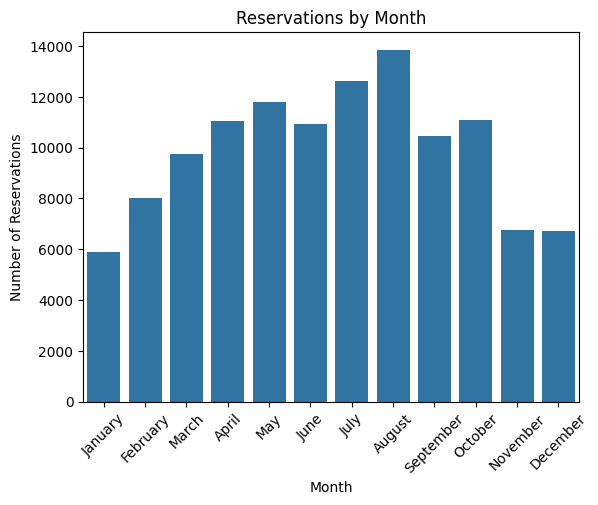

In [69]:
# Group by 'arrival_date_month' and count reservations
monthly_reservations = df.groupby('arrival_date_month')['is_canceled'].count()

# Sort by month for better visualization
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_reservations = monthly_reservations.reindex(month_order)

print("Reservations by Month:\n", monthly_reservations)

# Plot
sns.barplot(x=monthly_reservations.index, y=monthly_reservations.values)
plt.title("Reservations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Reservations")
plt.xticks(rotation=45)
plt.show()

Top 10 Countries by Reservations:
     country  total_reservations  total_cancellations  cancellation_rate
135     PRT               48590                27519          56.635110
59      GBR               12129                 2453          20.224256
56      FRA               10415                 1934          18.569371
51      ESP                8568                 2177          25.408497
43      DEU                7287                 1218          16.714697
81      ITA                3766                 1333          35.395645
76      IRL                3375                  832          24.651852
15      BEL                2342                  474          20.239112
25      BRA                2224                  830          37.320144
123     NLD                2104                  387          18.393536


<ipython-input-70-d0665e7d0fbd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='total_reservations', data=country_stats.head(10), palette='viridis')


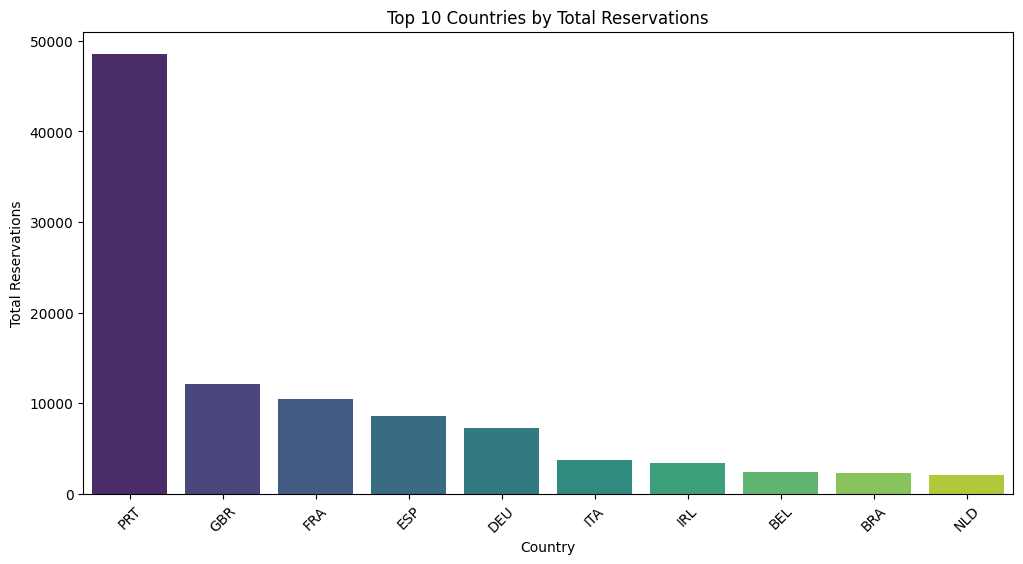

<ipython-input-70-d0665e7d0fbd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='cancellation_rate', data=country_stats.head(10), palette='magma')


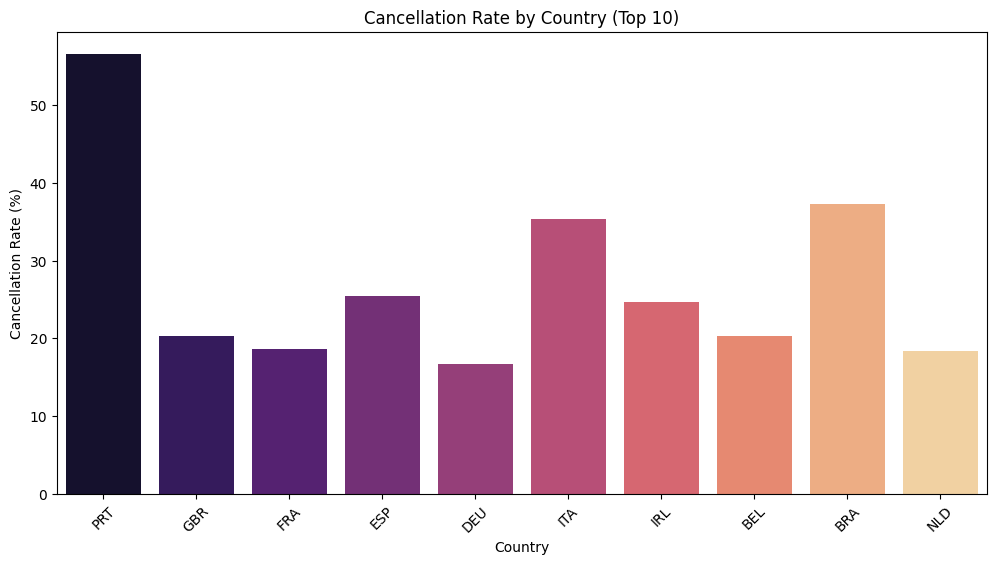

In [70]:
# Group by 'country' and calculate total reservations and cancellations
country_stats = df.groupby('country').agg(
    total_reservations=('is_canceled', 'count'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

# Calculate cancellation rate
country_stats['cancellation_rate'] = (country_stats['total_cancellations'] / country_stats['total_reservations']) * 100

# Sort by total reservations (descending)
country_stats = country_stats.sort_values(by='total_reservations', ascending=False)

# Display the top 10 countries by reservations
print("Top 10 Countries by Reservations:\n", country_stats.head(10))

# Plot total reservations by country (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_reservations', data=country_stats.head(10), palette='viridis')
plt.title("Top 10 Countries by Total Reservations")
plt.xlabel("Country")
plt.ylabel("Total Reservations")
plt.xticks(rotation=45)
plt.show()

# Plot cancellation rate by country (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='cancellation_rate', data=country_stats.head(10), palette='magma')
plt.title("Cancellation Rate by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [80]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.8 MB/s eta 0:00:00


In [79]:
unique_country_codes = df['country'].unique()
print("Unique Country Codes:\n", unique_country_codes)

Unique Country Codes:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI'
 'NAM' 'BOL' 'PRY' 'BRB' 'ABW

In [81]:
import pycountry

# Function to convert ISO Alpha-3 code to full country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except AttributeError:
        return "Unknown"  # Handle cases where the code is not found

# Example list of country codes
country_codes = [
    'PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG',
    'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS',
    'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN',
    'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB',
    'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB',
    'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV',
    'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL',
    'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
    'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
    'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
    'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW',
    'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL',
    'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 'ETH', 'IRQ', 'HND',
    'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA',
    'GAB', 'GHA', 'TMP', 'GLP', 'KEN', 'LIE', 'GNB', 'MNE', 'UMI', 'MYT',
    'FRO', 'MMR', 'PAN', 'BFA', 'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB',
    'ABW', 'AIA', 'SLV', 'DMA', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM',
    'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO'
]

# Map country codes to full names
country_names = [get_country_name(code) for code in country_codes]

# Display the results
for code, name in zip(country_codes, country_names):
    print(f"{code}: {name}")

PRT: Portugal
GBR: United Kingdom
USA: United States
ESP: Spain
IRL: Ireland
FRA: France
ROU: Romania
NOR: Norway
OMN: Oman
ARG: Argentina
POL: Poland
DEU: Germany
BEL: Belgium
CHE: Switzerland
CN: Unknown
GRC: Greece
ITA: Italy
NLD: Netherlands
DNK: Denmark
RUS: Russian Federation
SWE: Sweden
AUS: Australia
EST: Estonia
CZE: Czechia
BRA: Brazil
FIN: Finland
MOZ: Mozambique
BWA: Botswana
LUX: Luxembourg
SVN: Slovenia
ALB: Albania
IND: India
CHN: China
MEX: Mexico
MAR: Morocco
UKR: Ukraine
SMR: San Marino
LVA: Latvia
PRI: Puerto Rico
SRB: Serbia
CHL: Chile
AUT: Austria
BLR: Belarus
LTU: Lithuania
TUR: Türkiye
ZAF: South Africa
AGO: Angola
ISR: Israel
CYM: Cayman Islands
ZMB: Zambia
CPV: Cabo Verde
ZWE: Zimbabwe
DZA: Algeria
KOR: Korea, Republic of
CRI: Costa Rica
HUN: Hungary
ARE: United Arab Emirates
TUN: Tunisia
JAM: Jamaica
HRV: Croatia
HKG: Hong Kong
IRN: Iran, Islamic Republic of
GEO: Georgia
AND: Andorra
GIB: Gibraltar
URY: Uruguay
JEY: Jersey
CAF: Central African Republic
CYP: Cy

In [82]:
# Aggregate data by country
country_stats = df.groupby('country_name').agg(
    total_reservations=('is_canceled', 'count'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

# Calculate cancellation rate
country_stats['cancellation_rate'] = (country_stats['total_cancellations'] / country_stats['total_reservations']) * 100

# Display the results
print(country_stats.head())

  country_name  total_reservations  total_cancellations  cancellation_rate
0    Australia                 426                  107          25.117371
1      Austria                1263                  230          18.210610
2      Belgium                2342                  474          20.239112
3       Brazil                2224                  830          37.320144
4     Bulgaria                  75                   12          16.000000


In [83]:
import plotly.express as px

# Create a choropleth map for total reservations
fig_reservations = px.choropleth(
    country_stats,
    locations='country_name',  # Column with country names
    locationmode='country names',  # Use country names for mapping
    color='total_reservations',  # Column to determine color intensity
    hover_name='country_name',  # Display country name on hover
    title="Total Reservations by Country",
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
    labels={'total_reservations': 'Total Reservations'}
)

# Show the map
fig_reservations.show()

In [84]:
# Create a choropleth map for cancellation rates
fig_cancellation_rate = px.choropleth(
    country_stats,
    locations='country_name',  # Column with country names
    locationmode='country names',  # Use country names for mapping
    color='cancellation_rate',  # Column to determine color intensity
    hover_name='country_name',  # Display country name on hover
    title="Cancellation Rate by Country",
    color_continuous_scale=px.colors.sequential.Reds,  # Color scale
    labels={'cancellation_rate': 'Cancellation Rate (%)'}
)

# Show the map
fig_cancellation_rate.show()